### Sandra P K

## Car Price Prediction 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
d=pd.read_csv(r"C:\Users\HP\Documents\My DOCS\Oasis_Intern\Task3\car data1.csv")
d

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
d.head()  # To display first 5 rows 

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
d.tail()     # To display last 5 rows 

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
d.describe()        # Statistical information about dataset 

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
d.shape   # Display the number of rows and columns 

(301, 9)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
d.columns     # Display the all columns 

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
d.duplicated().sum()      # Find out the number of duplicated entries

2

In [10]:
d=d.drop_duplicates()

In [11]:
d.duplicated().sum() 

0

In [12]:
d.isnull().sum()       # Find the number of null or missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#### In the given dataset there is no null values

In [13]:
d1=d[['Fuel_Type','Car_Name','Selling_type', 'Transmission', 'Owner']]
d2=d[['Selling_Price', 'Present_Price', 'Driven_kms']] 

#### Data split into two categorical(d1) and numerical(d2)data

## Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
sc=s.fit_transform(d2)
d22=pd.DataFrame(sc,columns=d2.columns)
d22.head()

,Selling_Price,Present_Price,Driven_kms
0,-0.249127,-0.228138,-0.254603
1,0.032229,0.233742,0.156181
2,0.534651,0.269991,-0.770651
3,-0.349612,-0.396520,-0.814297
4,0.002084,-0.078466,0.142061


In [15]:
df=pd.concat([d22,d['Year']],axis=1)
df.head()

,Selling_Price,Present_Price,Driven_kms,Year
0,-0.249127,-0.228138,-0.254603,2014.0
1,0.032229,0.233742,0.156181,2013.0
2,0.534651,0.269991,-0.770651,2017.0
3,-0.349612,-0.396520,-0.814297,2011.0
4,0.002084,-0.078466,0.142061,2014.0


In [16]:
df.tail(5)

,Selling_Price,Present_Price,Driven_kms,Year
296,-0.249127,0.404463,1.309818,2016.0
297,1.388768,0.579860,-0.716735,2015.0
298,0.142762,-0.191889,-0.807519,2009.0
299,NaN,NaN,NaN,2017.0
300,NaN,NaN,NaN,2016.0


In [17]:
df = df.fillna(df.mean())
df.tail(5)

,Selling_Price,Present_Price,Driven_kms,Year
296,-2.491273e-01,4.044627e-01,1.309818e+00,2016.0
297,1.388768e+00,5.798604e-01,-7.167354e-01,2015.0
298,1.427618e-01,-1.918894e-01,-8.075187e-01,2009.0
299,3.481050e-17,-3.713120e-18,-1.819429e-17,2017.0
300,3.481050e-17,-3.713120e-18,-1.819429e-17,2016.0


### Encode the categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder
for i in d1:
    encoder=LabelEncoder()
    d1[i]=encoder.fit_transform(d1[i])
d1.head() 

,Fuel_Type,Car_Name,Selling_type,Transmission,Owner
0,2,90,0,1,0
1,1,93,0,1,0
2,2,68,0,1,0
3,2,96,0,1,0
4,1,92,0,1,0


In [19]:
df1=pd.concat([df,d1],axis=1)
df1.head(10)

,Selling_Price,Present_Price,Driven_kms,Year,Fuel_Type,Car_Name,Selling_type,Transmission,Owner
0,-0.249127,-0.228138,-0.254603,2014.0,2.0,90.0,0.0,1.0,0.0
1,0.032229,0.233742,0.156181,2013.0,1.0,93.0,0.0,1.0,0.0
2,0.534651,0.269991,-0.770651,2017.0,2.0,68.0,0.0,1.0,0.0
3,-0.349612,-0.396520,-0.814297,2011.0,2.0,96.0,0.0,1.0,0.0
4,0.002084,-0.078466,0.142061,2014.0,1.0,92.0,0.0,1.0,0.0
5,0.936588,0.267653,-0.894631,2018.0,1.0,95.0,0.0,1.0,0.0
6,0.434166,0.067699,-0.465233,2015.0,2.0,68.0,0.0,1.0,0.0
7,0.383924,0.124996,-0.089545,2015.0,1.0,91.0,0.0,1.0,0.0
8,0.836104,0.157737,-0.427312,2016.0,1.0,68.0,0.0,1.0,0.0
9,0.574845,0.161245,0.139930,2015.0,1.0,68.0,0.0,1.0,0.0


## Checking outliers

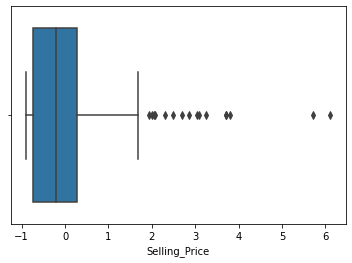

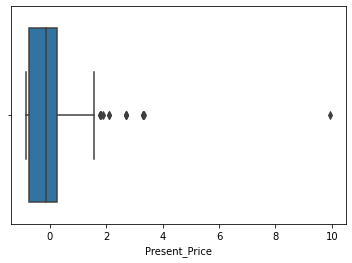

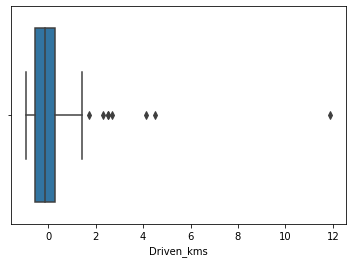

In [20]:
l=['Selling_Price', 'Present_Price', 'Driven_kms']
for i in l:
    sns.boxplot(df1[i])
    plt.show()

## Remove Outliers

In [21]:
l=['Selling_Price', 'Present_Price', 'Driven_kms']
for i in l:
    Q1=np.percentile(df1[i],25,interpolation="midpoint")
    Q3=np.percentile(df1[i],75,interpolation="midpoint")
    
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    
    for j in df1[i]:
        if j<lower:
            df1[i]=df1[i].replace(j,lower)
        elif j>upper:
            df1[i]=df1[i].replace(j,upper)

<AxesSubplot:>

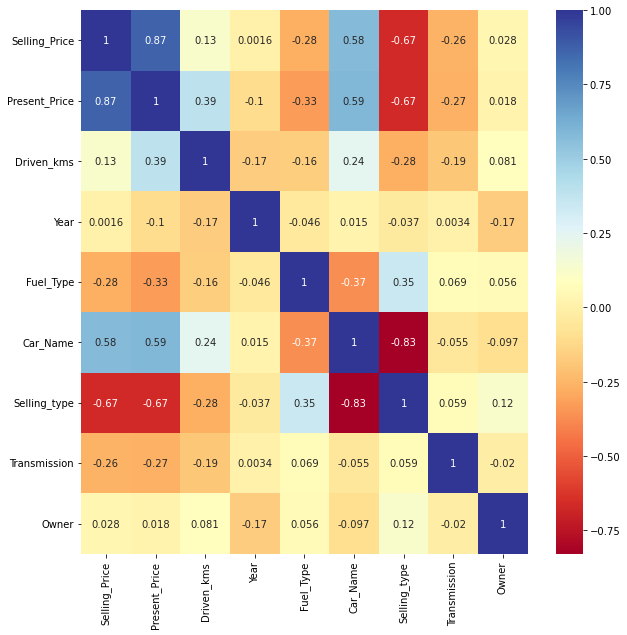

In [22]:
# Find the correlation between each pair of attributes 
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlBu')

### Data Visualization

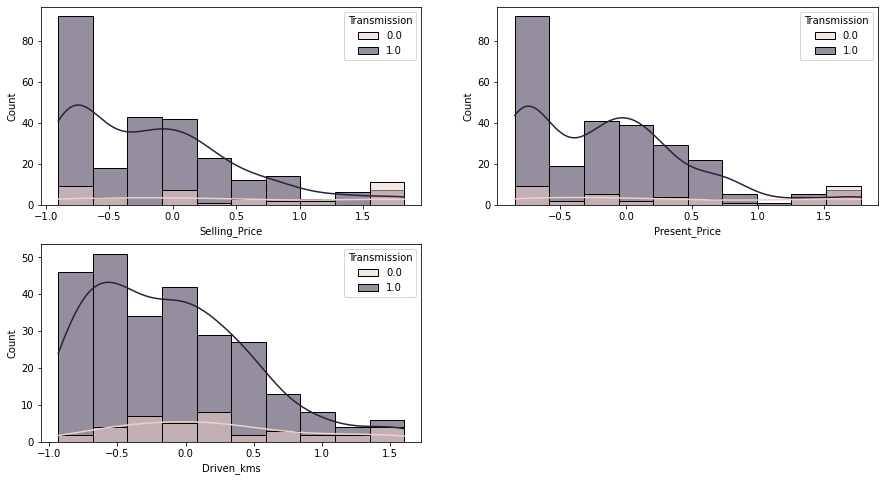

In [23]:
plt.figure(figsize = (15,8))
for i,j in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df1, x = j,kde = True,hue = 'Transmission')
plt.show()

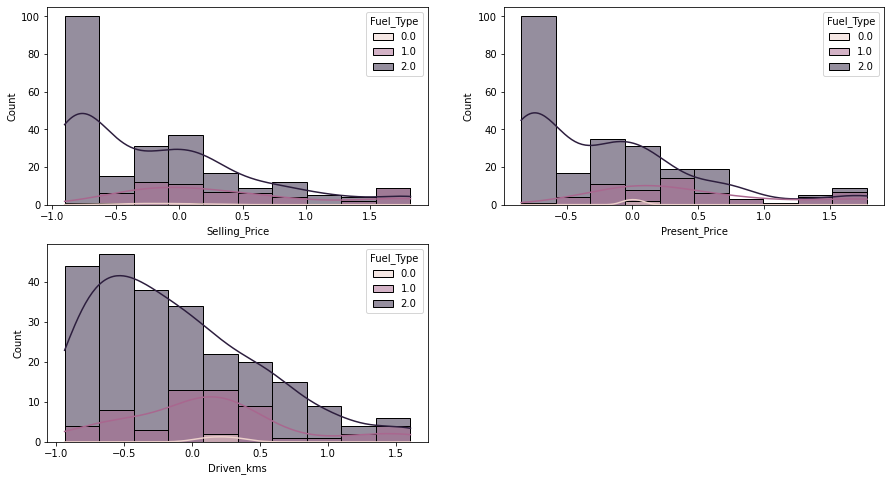

In [24]:
plt.figure(figsize = (15,8))
for i,j in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df1, x = j,kde = True,hue = 'Fuel_Type')
plt.show()

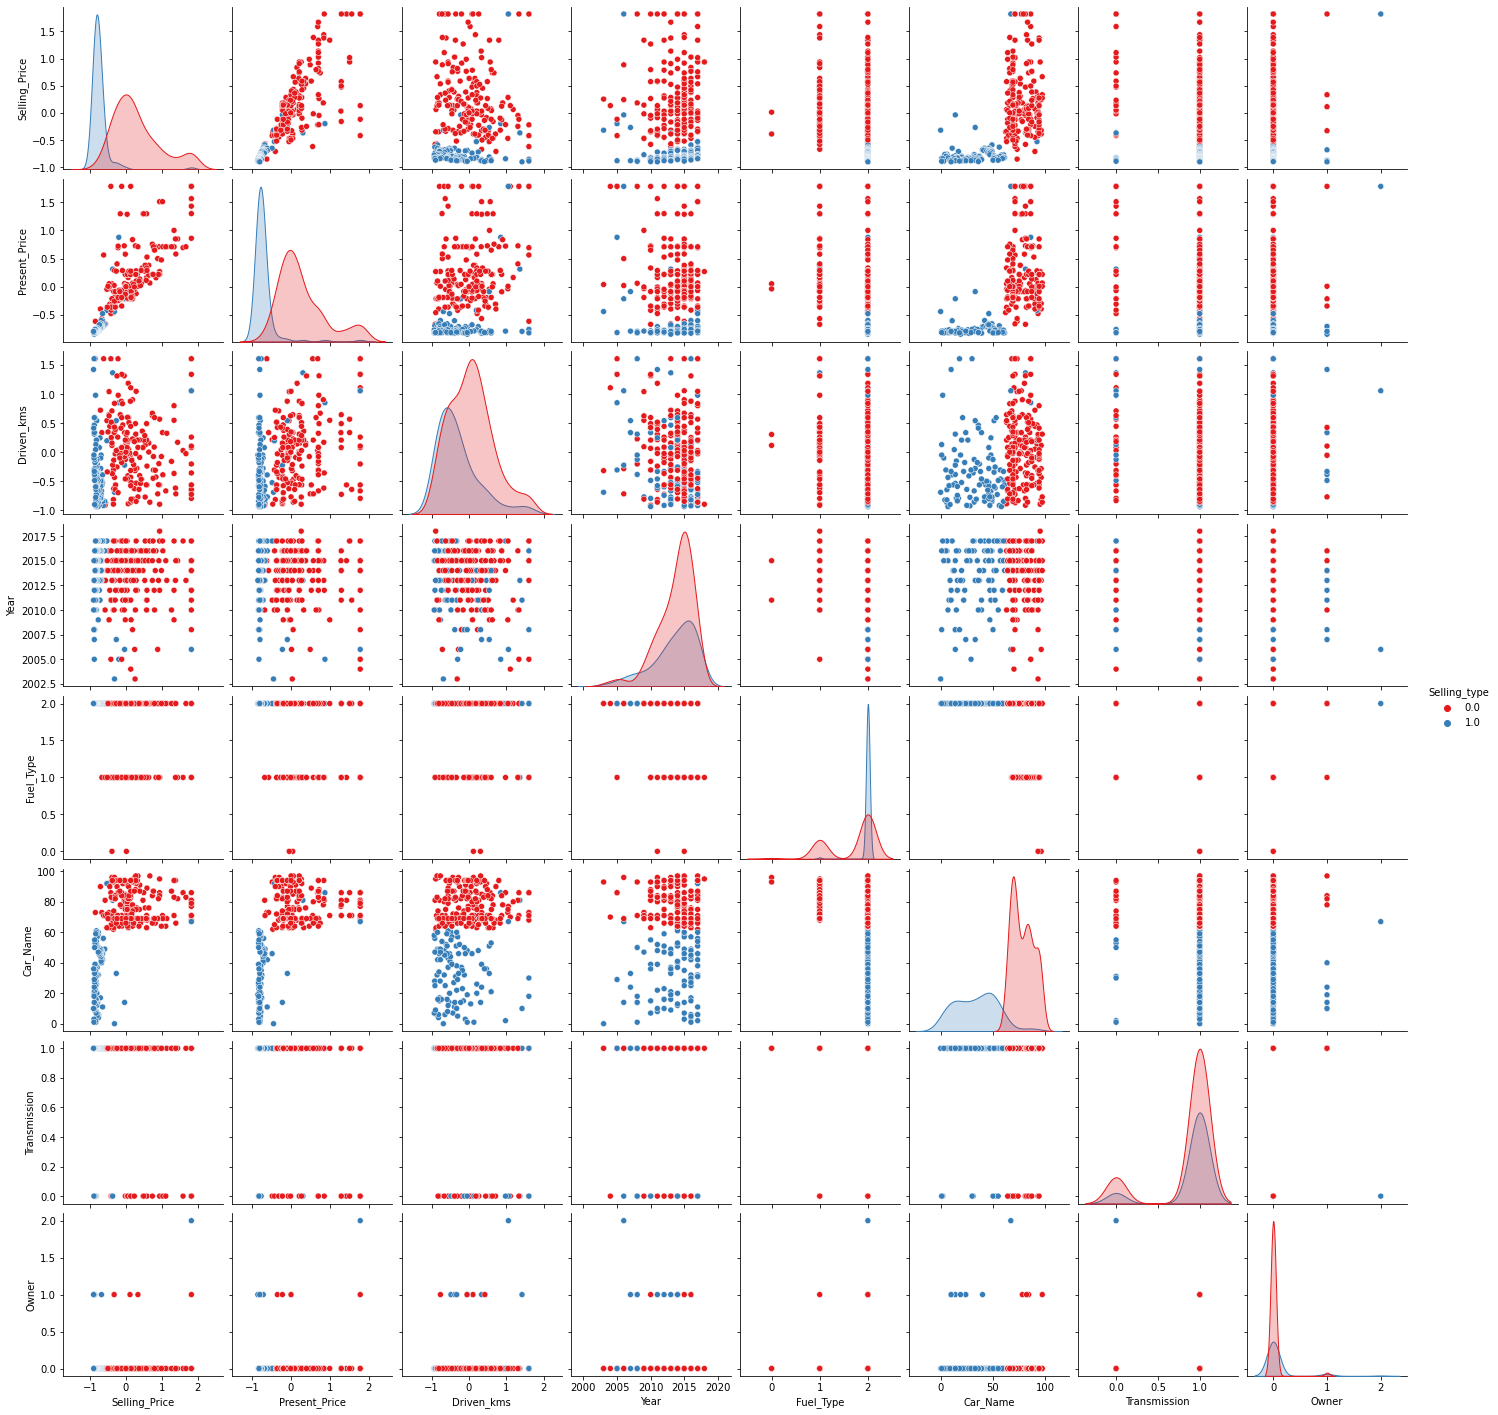

In [25]:
sns.pairplot(df1, hue="Selling_type", height=2.5, palette="Set1")

Text(0.5, 1.0, 'Scatter Plot of Transmission and Selling Type by Fuel Type')

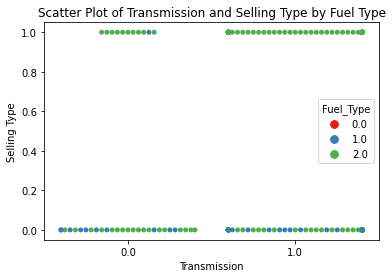

In [26]:
# Plotting Fuel_Type vs Selling_type
sns.swarmplot(x='Transmission', y='Selling_type', hue='Fuel_Type', data=df1, palette="Set1")

# Adjust labels and title as needed
plt.xlabel('Transmission')
plt.ylabel('Selling Type')
plt.title('Scatter Plot of Transmission and Selling Type by Fuel Type')

Text(0.5, 1.0, 'Count Plot of Selling Type by Year')

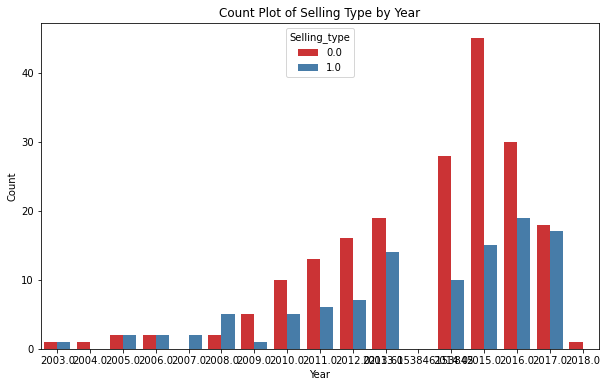

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='Selling_type', data=df1, palette="Set1")

# Adjust labels and title as needed
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count Plot of Selling Type by Year')

## Model Building

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# Replace NaN values in the entire dataset with the mean value
df1 = df1.fillna(df1.mean())

# Split the data into features (x) and target variable (y)
x = df1.drop('Selling_Price', axis=1)
y = df1['Selling_Price']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Replace NaN values in the training set
x_train = x_train.fillna(x_train.mean())

# Replace NaN values in the testing set using the mean values from the training set
x_test = x_test.fillna(x_train.mean())

# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

print("R2",r2_score(y_test,y_pred))

MSE 0.18888958343120124
R2 0.6548246627808111


## Interpretation

MSE is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is approximately 0.188, which indicates the average squared difference between the true selling prices and the predicted selling prices by the linear regression model.A lower MSE is generally better, indicating that the model's predictions are closer to the actual values.R-squared is a measure of how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit. R2 score is approximately 0.654, that around 65.4% of the variability in the selling prices can be explained by the independent variables in  model.The model seems to be performing well. 